# Machine Learning - Laboratory 2

Created by: daniel.kucharczyk@pwr.edu.pl

**Deadline:** Wednesday, October 16, at 11:59 PM CET.

---

1. Complete the implementation of `GradientDescentOptimizer` according to the best coding standard so that the class can be used in a way shown below.
2. For the provided case of $y=x^2$, create several plots with different values of `learning_rate` e.g $\{0.001, 0.1, 0.5, 0.9\}$. While plotting the results, try to use `subplots`.
3. Extend the notebook by adding an example dealing with the minimization of $f(x,y)=x^2 + y^2$ using the aforementioned class. Using `matplotlib` library generate the following plots:
    - A 3D surface plot of the function
    - A contour plot showing the optimization path

In [9]:
# Don't modify this line
import sys


sys.path.append("../")

In [10]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np

from src.optimizers import GradientDescentOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Define the cost function: f(x) = x^2
def cost_function(x):
    return x**2


# Define the gradient of the cost function: f'(x) = 2x
def gradient_function(x):
    return 2 * x


# Create an instance of the optimizer
optimizer = GradientDescentOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial_x = 5.0

# Run the optimization
optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)

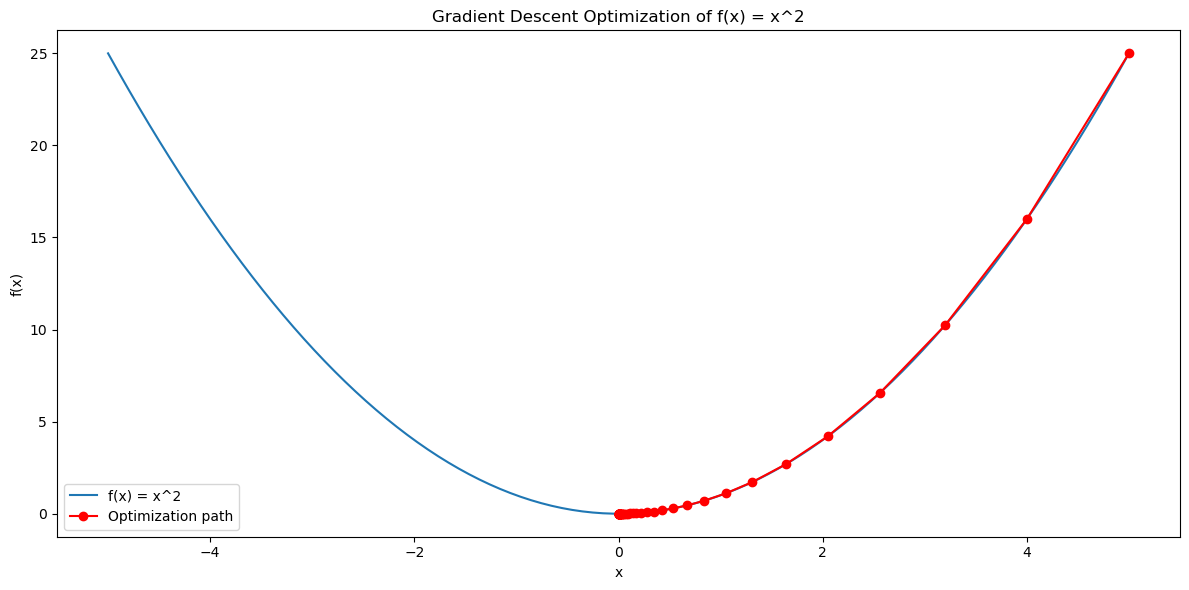

In [12]:
# Plot the optimization process
plt.figure(figsize=(12, 6))

# Plot the cost function
x = np.linspace(-5, 5, 100)
y = cost_function(x)
plt.plot(x, y, label="f(x) = x^2")

# Plot the optimization path
params_history = [c[0] for c in cost_history]
costs_history = [c[1] for c in cost_history]
plt.plot(params_history, costs_history, "ro-", label="Optimization path")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent Optimization of f(x) = x^2")
plt.legend()
plt.tight_layout()
plt.show()

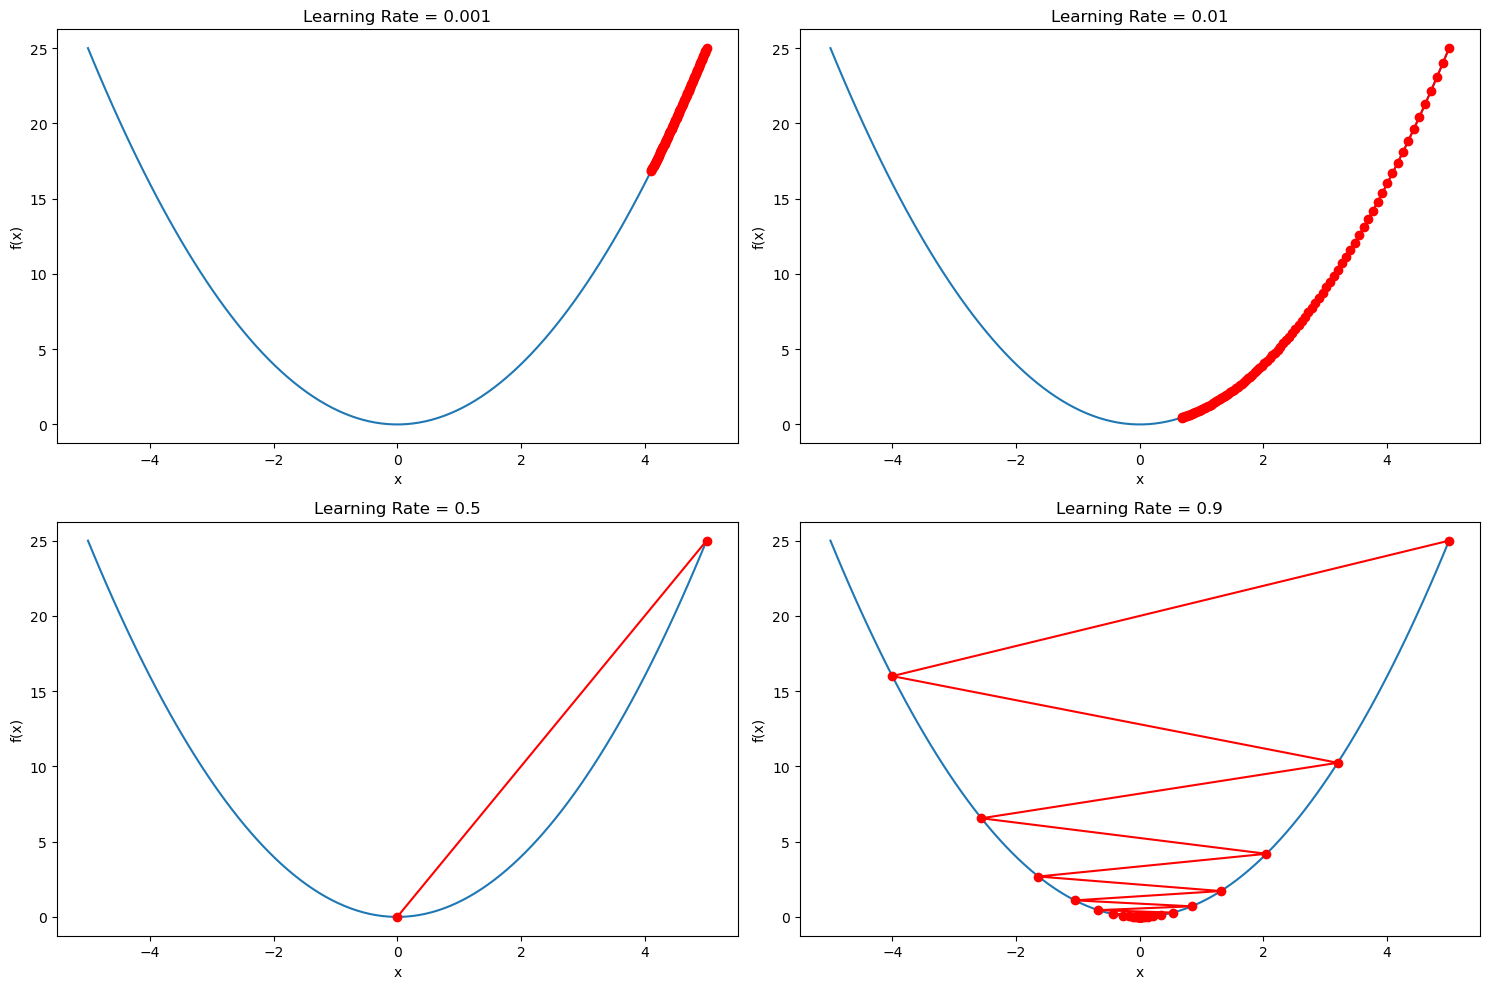

In [13]:
# Plot the optimization process
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
learning_rates = [0.001, 0.01, 0.5, 0.9]
index = 0
x = np.linspace(-5, 5, 100)
y = cost_function(x)

for alpha in learning_rates:
    optimizer = GradientDescentOptimizer(learning_rate=alpha, max_iterations=100, tolerance=1e-6)
    optimal_x, cost_history = optimizer.optimize(cost_function, gradient_function, initial_x)
    row = index // 2
    col = index % 2
    ax = axes[row, col]
    index += 1

    ax.plot(x, y, label="f(x) = x^2")
    params_history = [c[0] for c in cost_history]
    costs_history = [c[1] for c in cost_history]
    ax.plot(params_history, costs_history, "ro-", label=f"Path (lr={alpha})")

    ax.set_title(f"Learning Rate = {alpha}")
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")

plt.tight_layout()
plt.show()

In [14]:
# Define the cost function: f(x,y)=x^2 + y^2
def cost_function(params):
    x, y = params
    return x**2 + y**2


# Define the gradient of the cost function: f'(x,y) = [2x,2y]
def gradient_function(params):
    x, y = params
    return [2 * x, 2 * y]


# Create an instance of the optimizer
optimizer = GradientDescentOptimizer(learning_rate=0.1, max_iterations=100, tolerance=1e-6)

# Set the initial parameter value
initial = [5.0, 5.0]

# Run the optimization
optimal, cost_history = optimizer.optimize(cost_function, gradient_function, initial)

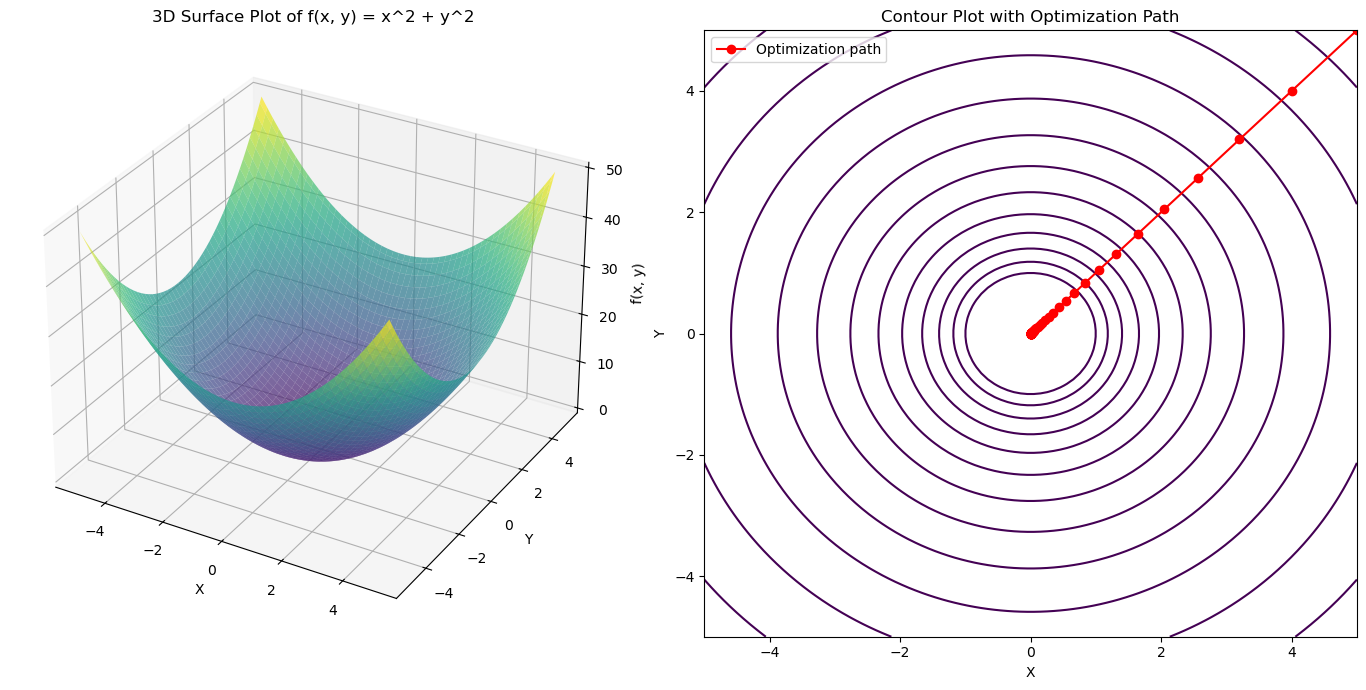

In [15]:
# Create the 3D plot of the function f(x, y) = x^2 + y^2
fig = plt.figure(figsize=(14, 7))

# First figure: 3D surface plot
ax = fig.add_subplot(121, projection="3d")

# Create a grid of values for x and y
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.7)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x, y)")
ax.set_title("3D Surface Plot of f(x, y) = x^2 + y^2")

# Second figure: Contour plot
ax2 = fig.add_subplot(122)

# Plot the contour of the function
ax2.contour(X, Y, Z, levels=np.logspace(0, 5, 35), cmap="viridis")

# Plot the optimization path
params_history = np.array([c[0] for c in cost_history])  # Extract the optimization path from cost_history
ax2.plot(params_history[:, 0], params_history[:, 1], "ro-", label="Optimization path")

# Labels and title for the contour plot
ax2.set_xlabel("X")
ax2.set_ylabel("Y")
ax2.set_title("Contour Plot with Optimization Path")
ax2.legend()

# Adjust layout for better spacing between plots
plt.tight_layout()
plt.show()